In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Load Cleaned Datasets

In [2]:
df1_filtered = pd.read_csv("asserts/df1_filtered.csv")
df1_filtered.head()

,State,County,City,Make,Model,ModelYear,EVType,ElectricRange,BasePrice
0,WA,King,Seattle,BMW,X5,2023,PHEV,30,0
1,WA,Yakima,Moxee,FORD,ESCAPE,2022,PHEV,38,0
2,WA,King,Seattle,CHEVROLET,BOLT EV,2018,BEV,238,0
3,WA,King,Newcastle,TESLA,MODEL S,2013,BEV,208,69900
4,WA,Kitsap,Bremerton,FORD,C-MAX,2015,PHEV,19,0


In [3]:
df2_filtered = pd.read_csv("asserts/df2_filtered.csv")
df2_filtered.head()

,Date,State,County,BEVCount,PHEVCount,EVTotal,NonEVTotal
0,2021-04-30,WA,Thurston,0,0,0,56710
1,2017-10-31,WA,Adams,3,3,6,12283
2,2018-07-31,WA,Whatcom,2,0,2,42313
3,2019-08-31,WA,Grays Harbor,0,0,0,20570
4,2019-10-31,WA,Cowlitz,0,0,0,29023


In [4]:
# Filter the datasets for each state
df1_wa = df1_filtered[df1_filtered['State'] == 'WA']
df1_ca = df1_filtered[df1_filtered['State'] == 'CA']

df2_wa = df2_filtered[df2_filtered['State'] == 'WA']
df2_ca = df2_filtered[df2_filtered['State'] == 'CA']



## Analysis and Visualizations

### Cross-State EV Adoption Dynamics: A Comparative Analysis of Washington and California

Which 5 counties, among all counties in WA/CA State, have experienced the most significant cumulative growth in electric vehicle (EV) adoption over time, and how do their annual growth rates and absolute EV counts compare to those of all other counties in the state?

In [5]:


def analyze_county_ev_adoption(df_state, state_name):
    
    df_state['Year'] = pd.to_datetime(df_state['Date']).dt.year
    annual_ev_total = df_state.groupby(['County', 'Year'])['EVTotal'].sum().reset_index()
    annual_ev_total['GrowthRate'] = annual_ev_total.groupby('County')['EVTotal'].pct_change() * 100
    
    # Calculate cumulative growth rate for each county
    cumulative_growth = annual_ev_total.groupby('County')['GrowthRate'].prod().reset_index()
    cumulative_growth.columns = ['County', 'CumulativeGrowthRate']
    top_5_growth_counties = cumulative_growth.sort_values(by='CumulativeGrowthRate', ascending=False).head(5)
    

    
    # Filter annual EV total to include only top 5 growth counties
    annual_ev_total_top_5 = annual_ev_total[annual_ev_total['County'].isin(top_5_growth_counties['County'])]
    
    # Create four subplots
    fig, axs = plt.subplots(2, 2, figsize=(16, 12))
    
    # growth rate for all countries
    sns.lineplot(data=annual_ev_total, x='Year', y='GrowthRate',
                 hue='County', marker='o', ax=axs[0, 0], palette='tab10')
    axs[0, 0].set_title(f'Annual Growth Rate of EV Adoption for All Counties in {state_name}')
    axs[0, 0].set_ylabel('Growth Rate (%)')
    axs[0, 0].get_legend().remove()  
    
    # growth rate for top 5 counties
    sns.lineplot(data=annual_ev_total_top_5, x='Year', y='GrowthRate',
                 hue='County', marker='o', ax=axs[0, 1], palette='tab10')
    axs[0, 1].set_title(f'Annual Growth Rate of EV Adoption for Top 5 Growth Counties in {state_name}')
    axs[0, 1].set_ylabel('Growth Rate (%)')
    
    # absolute ev counts for all counties
    sns.lineplot(data=annual_ev_total, x='Year', y='EVTotal', 
                 hue='County', marker='o', ax=axs[1, 0], palette='tab20b')
    axs[1, 0].set_title(f'Absolute EV Counts of EV Adoption for All Counties in {state_name}')
    axs[1, 0].set_ylabel('EV Total Count')
    axs[1, 0].get_legend().remove()  
    
    # absolute ev counts for top 5 counties
    sns.lineplot(data=annual_ev_total_top_5, x='Year', y='EVTotal', 
                 hue='County', marker='o', ax=axs[1, 1], palette='tab20b')
    axs[1, 1].set_title(f'Absolute EV Counts of EV Adoption for Top 5 Growth Counties in {state_name}')
    axs[1, 1].set_ylabel('EV Total Count')
    
    # legend
    handles, labels = axs[0, 1].get_legend_handles_labels()
    axs[0, 1].legend(handles=handles[1:], labels=labels[1:])
    handles, labels = axs[1, 1].get_legend_handles_labels()
    axs[1, 1].legend(handles=handles[1:], labels=labels[1:])
    plt.tight_layout()
    plt.show()
    
    return top_5_growth_counties


C:\Users\qfu88\AppData\Local\Temp\ipykernel_27112\3779623697.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['Year'] = pd.to_datetime(df_state['Date']).dt.year


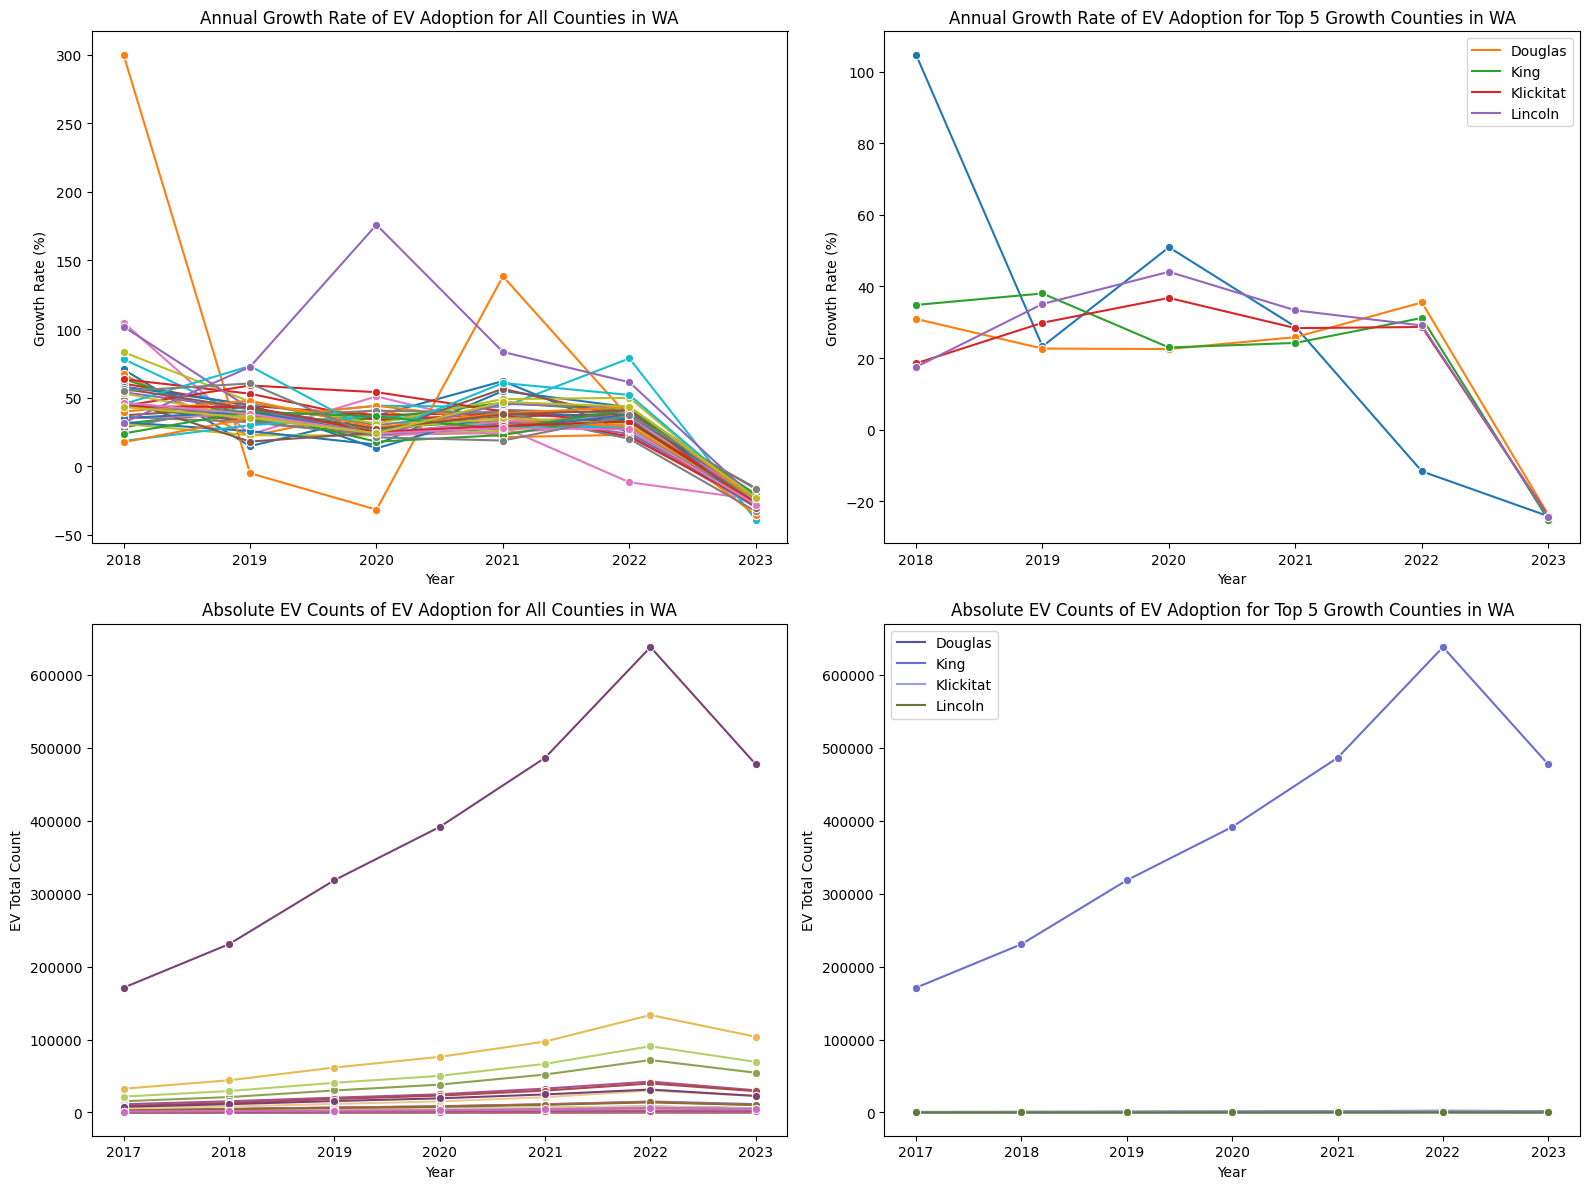

WA        County  CumulativeGrowthRate
6    Columbia          1.005046e+09
8     Douglas         -3.451894e+08
19  Klickitat         -3.997471e+08
16       King         -5.799180e+08
21    Lincoln         -6.422970e+08


In [6]:
# WA
top_5_growth_counties_wa = analyze_county_ev_adoption(df2_wa, 'WA')
print("WA", top_5_growth_counties_wa)


### Result of WA Analysis

Findings: 

Growth Rate Trend Analysis
Most counties in WA state exhibited similar trends over time, with a significant drop in growth rates from 2022 to 2023.

The top 5 counties, particularly one, showed a more drastic change in growth rates over the years. This suggests that these counties might have experienced some unique events or conditions that affected EV adoption differently from the rest.

The decline in growth rate in 2023 across counties might indicate a saturation point in EV adoption or external factors affecting the entire state, such as policy changes or economic conditions.

Absolute EV Count Analysis:

Some counties exhibit minimal change in absolute EV counts over the years, indicating lower adoption rates.

The notable increase from 2021 to 2022 and the subsequent drop from 2022 to 2023 in one county could be due to localized factors or events promoting EV adoption in the short term, followed by a reversion to the mean.

The county with a dramatic increase in EV counts and subsequent drop might have a more considerable influence on the state's overall EV adoption trends, given its substantial variation in EV counts.

Comparison Between Growth Rate and Absolute Counts:

The counties with the highest cumulative growth rates are not necessarily the ones with the highest absolute EV counts. This contrast implies that growth rates alone might not fully represent the state of EV adoption in the county, especially if the initial counts are low.
The county with substantial variations in both growth rate and absolute EV counts which is King county requires further investigation to understand the underlying causes and implications better.

Analysis why King county stands out in term of variations in both growth rate and absolute EV counts:

1. Economic Factors:
 King County's average income and specific economic incentives for EVs influence higher EV adoption.
2. Infrastructure:
The availability of charging stations and the efficiency of public transportation in King County impact on EV ownership trends.
3. Demographic and Psychographic Factors:
King County's population density, education levels, and environmental awareness correlate with EV adoption rates.
4. Policy & Regulation:
The local policies and fleet conversions in King County to assess promote EV adoption through various benefits and initiatives.
5. Market Dynamics:
The concentration of EV dealerships and fluctuations in fuel prices in King County effects on the attractiveness of EVs.
6. External Shocks:
The significant events or anomalies in King County that could have temporarily spiked interest and adoption of EVs.
7. Community Engagement:
The community initiatives and public awareness campaigns in King County promote sustainability and EV adoption.




C:\Users\qfu88\AppData\Local\Temp\ipykernel_27112\3779623697.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['Year'] = pd.to_datetime(df_state['Date']).dt.year
C:\Users\qfu88\anaconda3\envs\dojo-env\lib\site-packages\seaborn\relational.py:414: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  cis = grouped.apply(bootstrapped_cis)


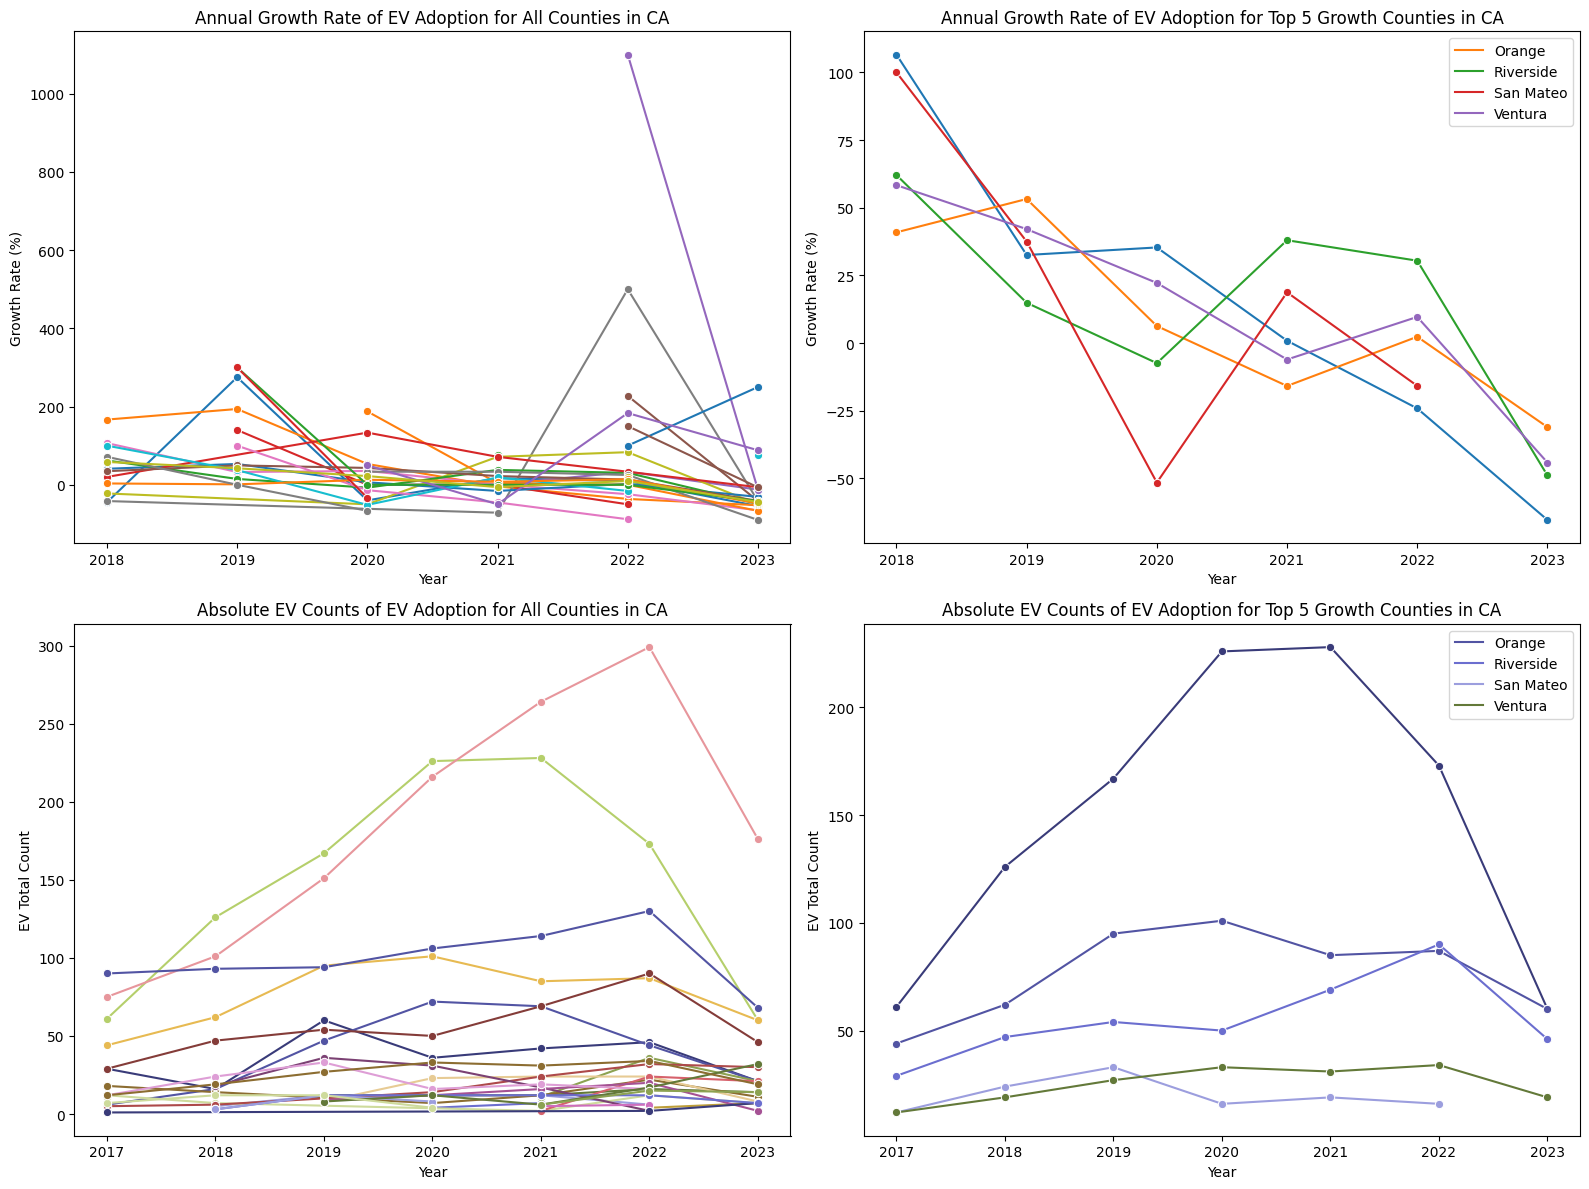

CA          County  CumulativeGrowthRate
12    Riverside          3.871728e+08
6   Los Angeles          1.708103e+08
28      Ventura          1.412305e+08
19    San Mateo          5.719199e+07
10       Orange          1.590831e+07


In [7]:
# CA

top_5_growth_counties_ca = analyze_county_ev_adoption(df2_ca, 'CA')
print("CA", top_5_growth_counties_ca)

### Result of CA Analysis

It seems that in California, especially in the counties of Riverside, Los Angeles, Ventura, San Mateo, and Orange, there are significant variations in EV adoption growth rates and absolute EV counts over the years from 2018 to 2023. These variations hint at a multifaceted dynamic, possibly influenced by several underlying factors.

Overall Growth Rate:

Most counties experienced variable growth rates from 2018 to 2023, with a notable increase for some in 2019, stabilization or marginal growth until 2022, followed by a drop in 2023.
Top 5 Counties:

Displayed more substantial fluctuations in growth rate, with Riverside and Los Angeles witnessing pronounced peaks and troughs.
Absolute EV Counts:

The absolute counts for most counties remained relatively stable, with notable exceptions in the top 5, particularly marked by significant increases till 2022 and a subsequent drop in 2023.




### A comparison between WA and CA reveals several similarities and differences

The standout counties in both states likely share similar characteristics and contributing factors that drive the high EV adoption rates. These similarities may span across economic factors, infrastructure availability, demographic and sociocultural attributes, supportive policy environments, and the level of urbanization and population density, as discussed in relation to King County.

In WA, King County may be standing out due to its economic prosperity, high population density, and urbanization, and possibly because of Seattle’s presence with its tech-savvy population and strong environmental ethos.

In CA, Los Angeles and Orange counties may stand out due to their substantial population, economic prosperity, and the presence of numerous charging infrastructures and dealerships.

"As observed, both states, WA and CA, exhibit a significant drop from 2022 to 2023, potentially attributable to a variety of factors. For example:


Economic Conditions:
An economic downturn or recession could have occurred, reducing consumer purchasing power and willingness to invest in new vehicles, especially EVs which might have a higher upfront cost.

Supply Chain Issues:
Disruptions in the supply chain could have led to delays or reductions in the availability of EVs, impacting adoption rates.

 Fuel Prices:
A significant decrease in fuel prices could make traditional internal combustion engine vehicles more economically attractive relative to EVs.





### Comparative Analysis of BEV and PHEV Adoption Dynamics in Top Counties of WA and CA

How have the yearly adoption trends and preferences for BEV and PHEV, EV and NonEV compared to each other within the top 5 counties?

In [8]:
top_counties_WA = ['Columbia', 'Douglas', 'Klickitat', 'King', 'Lincoln']
top_counties_CA = ['Riverside', 'Los Angeles', 'Ventura', 'San Mateo', 'Orange']

In [9]:
def analyze_ev_counts(df, state_name, top_counties):
    # Filter top 5 for each state
    top_counties_df = df[(df['State'] == state_name) & (df['County'].isin(top_counties))]
    
    # Extract year and group by year and county
    top_counties_df['Year'] = pd.to_datetime(top_counties_df['Date']).dt.year
    grouped_df = top_counties_df.groupby(['County', 'Year'])[['BEVCount', 'PHEVCount']].sum().reset_index()
    
    # Melting the df
    bev_phev_df = grouped_df.melt(id_vars=['County', 'Year'], value_vars=['BEVCount', 'PHEVCount'])
    
    
    for county in top_counties:
        sns.set_style("whitegrid")
        palette = "viridis"
        
        # Initialize the figure
        fig, ax = plt.subplots(figsize=(8, 4)) 
        
        # Plotting BEV and PHEV
        sns.barplot(x='Year', y='value', hue='variable', 
                    data=bev_phev_df[bev_phev_df['County'] == county], ax=ax, palette=palette)
        ax.set_title(f'{county} County in {state_name} - BEV and PHEV Counts Over Years', 
                     fontsize=16, fontweight='bold')
        ax.set_ylabel('Count', fontsize=12)
        ax.set_xlabel('Year', fontsize=12)
        ax.legend(loc='upper right', frameon=True, title="Vehicle Type", title_fontsize='13', fontsize='11')
        ax.grid(True, linestyle='--', alpha=0.7)
        ax.tick_params(axis='x', rotation=45)
        
        plt.tight_layout(pad=3.0)
        plt.show()


C:\Users\qfu88\AppData\Local\Temp\ipykernel_27112\2629439724.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_counties_df['Year'] = pd.to_datetime(top_counties_df['Date']).dt.year


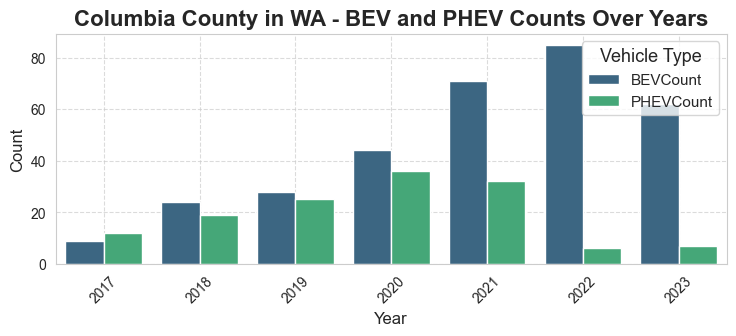

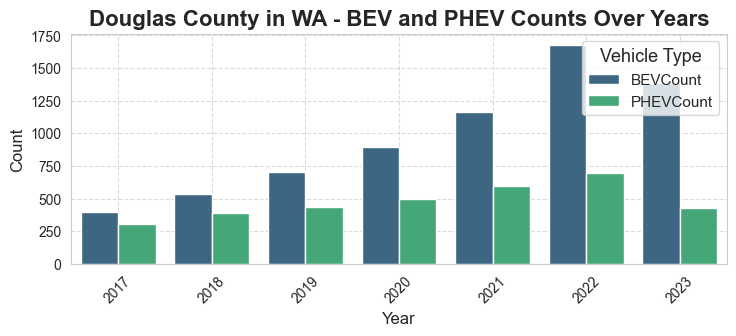

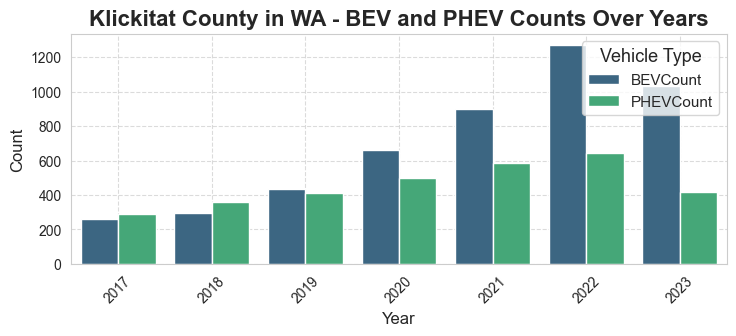

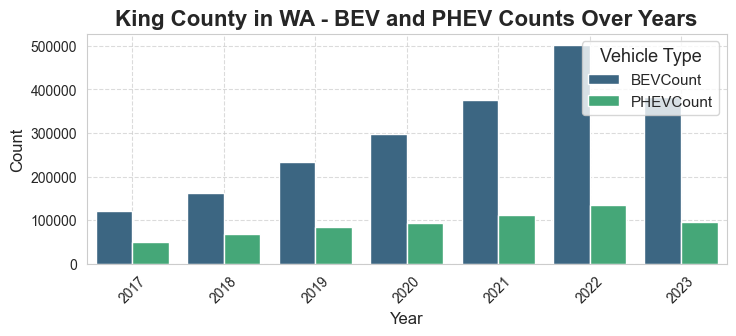

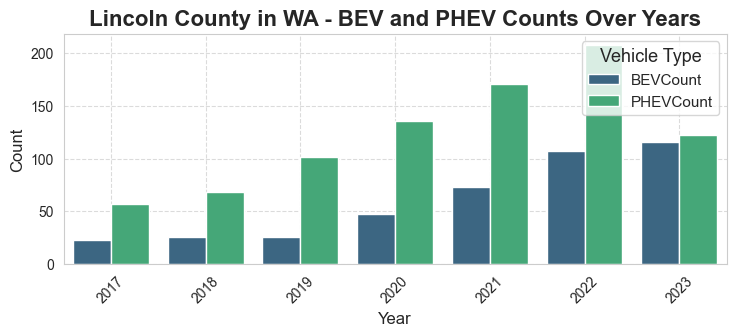

In [10]:
analyze_ev_counts(df2_filtered, 'WA', top_counties_WA)

### Result of WA Analysis

 PHEV and BEV Adoption:
 
The majority of counties initially had more PHEV (Plug-in Hybrid Electric Vehicle) than BEV (Battery Electric Vehicle) or roughly equal numbers. However, post-2017, BEVs saw a substantial increase, overshadowing PHEVs in most counties by a considerable margin. This suggests that there’s a growing preference for fully electric vehicles over plug-in hybrids in these areas, possibly due to advancements in battery technology, charging infrastructure, or a change in consumer preferences, emphasizing sustainability and fuel efficiency.

Lincoln County diverges from this trend, with PHEVs maintaining and even increasing their dominance over BEVs throughout the period. This might be indicative of specific local preferences, needs, or conditions that make PHEVs more attractive in Lincoln County.

King County is distinctive, with a high number of BEVs from the beginning and the gap widening over time. This could be indicative of a more environmentally conscious population, better charging infrastructure, or higher income levels allowing for the adoption of BEVs, which can be more expensive upfront.


Possible Factors:

Local policies, incentives, consumer awareness, and education levels, along with infrastructure availability and development, could be influential factors behind the observed trends. For instance, more urbanized or densely populated areas like King County may have better access to charging stations and may be exposed to more information and awareness about the benefits of EVs.

Economic conditions and median income levels could also play a significant role in EV adoption trends. Higher average income levels may lead to a higher willingness to invest in EVs.

Lincoln County’s Unique Trend:
The persistent preference for PHEVs in Lincoln County requires further investigation. It would be interesting to understand the demographic, geographic, economic, and infrastructural conditions influencing this trend.

C:\Users\qfu88\AppData\Local\Temp\ipykernel_27112\2629439724.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_counties_df['Year'] = pd.to_datetime(top_counties_df['Date']).dt.year


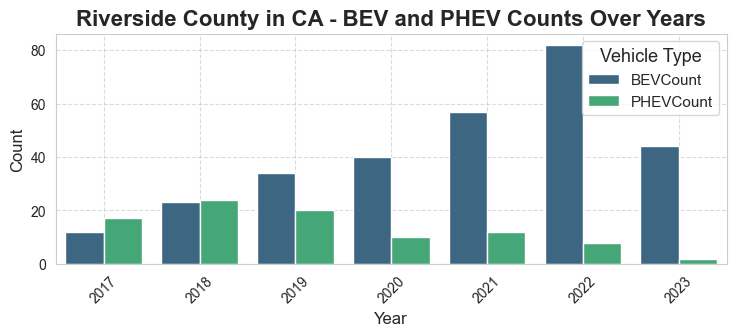

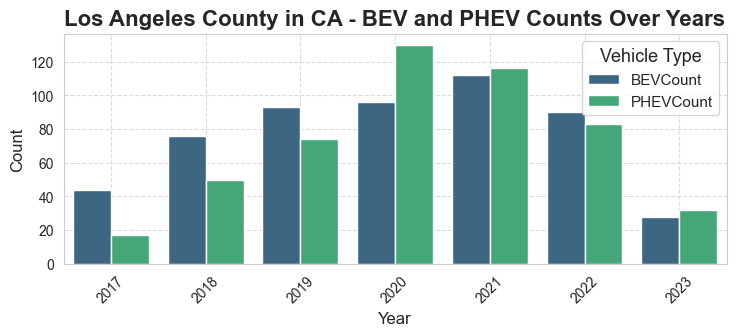

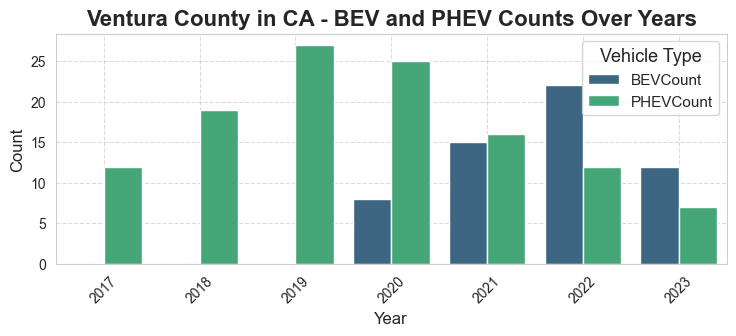

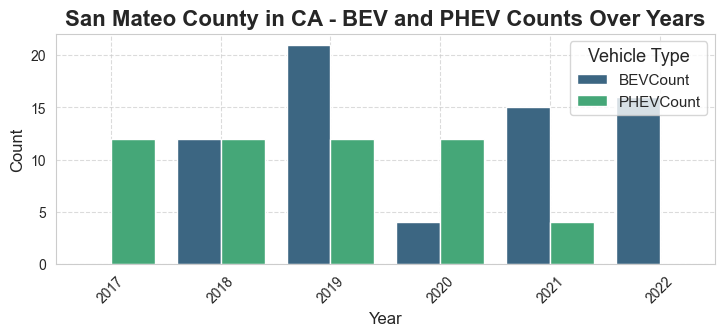

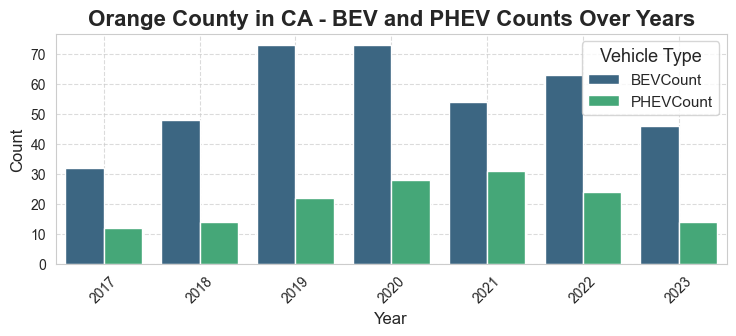

In [11]:
analyze_ev_counts(df2_filtered, 'CA', top_counties_CA)

### Result of CA Analysis

 PHEV and BEV Adoption:
 
In Riverside County, there has been a noticeable shift in preference from PHEVs to BEVs from 2019 onwards, with a considerable increase in BEVs and a decrease in PHEVs.

Los Angeles County experienced a distinct trend where PHEVs witnessed a higher growth rate than BEVs between 2017 and 2020, leading to more PHEVs than BEVs in 2020. However, this trend stabilized post-2020, with BEVs and PHEVs reaching a comparable level of adoption by 2023.

Ventura County saw no BEV adoption until 2019, after which there was a swift change in consumer preference, with BEVs gaining rapid traction and surpassing PHEVs by 2022.

San Mateo County experienced variability in BEV and PHEV preferences between years but leaned towards more BEVs by 2022.

Orange County consistently demonstrated a strong preference for BEVs over PHEVs from 2017 to 2023.

The varying trends between the counties can be indicative of diverse consumer bases with different needs, preferences, and access to resources and infrastructure.
Each county's distinct trends may also reflect variations in local policies, incentives, and the availability of charging infrastructure that influence consumer purchasing decisions.


Overall Insights:
The observed trends suggest that while there is growing interest in BEVs in most counties, there are localized variations in adoption rates and preferences between BEVs and PHEVs.

The consistent preference for BEVs in some counties like Orange may suggest a more favorable environment, policies, or consumer awareness that promote BEVs.

The very visible shift from PHEVs to BEVs in some counties may point to evolving consumer perceptions about the viability and benefits of fully electric vehicles, possibly influenced by improvements in charging infrastructure and battery technology.

### A comparison between WA and CA reveals several similarities and differences

Similarities:


In both states, there seems to be a notable shift in preference from PHEV to BEV over time, highlighting a growing consumer inclination towards fully electric vehicles.

Initial years demonstrate a preference or higher adoption rates for PHEVs in several counties, possibly due to the flexibility they offer with both electric and gasoline powertrains.

The analysis shows substantial growth in BEV adoption in subsequent years in multiple counties, suggesting increasing consumer confidence in battery electric technology and charging infrastructure.

Some counties like King in WA and Los Angeles in CA seem to be early adopters and exhibit distinct patterns compared to their peers, potentially due to demographic, economic, or policy-related factors.

Differences:

The rate of adoption for BEVs and PHEVs seems to vary between the states and among the counties, with some experiencing rapid increases in BEV adoption, while others show steadier, more gradual growth or even declines in certain cases.


The counties exhibit varied preferences, with some showing sustained preference for PHEVs (like Lincoln County, WA), while others exhibit clear preference for BEVs (like Orange County, CA).


Certain counties like King in WA exhibit early and consistent preference for BEVs, while some counties in CA show more fluctuating preferences between BEVs and PHEVs over the years.

### A Comparative Analysis of Evolving Preferences in Electric Vehicle Adoption across WA and CA

What types of electric vehicles are most popular, and what are their typical characteristics like make, model, EVtype etc.?

In [12]:
# wa
df1_top_counties_WA = df1_filtered[(df1_filtered['State'] == 'WA') & (df1_filtered['County'].isin(top_counties_WA))]

# ca
df1_top_counties_CA = df1_filtered[(df1_filtered['State'] == 'CA') & (df1_filtered['County'].isin(top_counties_CA))]



In [13]:
df1_top_counties_WA["County"].value_counts()

King         75383
Douglas        285
Klickitat      234
Lincoln         37
Columbia        16
Name: County, dtype: int64

In [14]:
df1_top_counties_CA["County"].value_counts()

Los Angeles    8
Orange         8
Riverside      6
Ventura        2
Name: County, dtype: int64

In [15]:

def get_top_ev_for_each_county(top_counties_df, state_name, top_counties):


    # Group by County and EV attributes and count the occurrences
    grouped_df = top_counties_df.groupby(['County', 'Make', 'Model', 'ModelYear', 'EVType', 'ElectricRange']).size().reset_index(name='Counts')

    
    top_ev_df = pd.DataFrame()

    
    for county in top_counties:
        county_df = grouped_df[grouped_df['County'] == county].nlargest(3, 'Counts')
        top_ev_df = pd.concat([top_ev_df, county_df])

    return top_ev_df

In [16]:
# Get the top 3 EVs for each county in both states
top_ev_WA = get_top_ev_for_each_county(df1_top_counties_WA, 'WA', top_counties_WA)
top_ev_CA = get_top_ev_for_each_county(df1_top_counties_CA, 'CA', top_counties_CA)


print("Top 3 EVs for each county in WA:")
top_ev_WA


Top 3 EVs for each county in WA:


,County,Make,Model,ModelYear,EVType,ElectricRange,Counts
1,Columbia,FORD,F-150,2022,BEV,0,5
0,Columbia,CHEVROLET,BOLT EV,2017,BEV,238,2
9,Columbia,TESLA,MODEL Y,2023,BEV,0,2
108,Douglas,TESLA,MODEL Y,2023,BEV,0,17
85,Douglas,TESLA,MODEL 3,2019,BEV,220,14
89,Douglas,TESLA,MODEL 3,2022,BEV,0,13
674,Klickitat,TESLA,MODEL Y,2023,BEV,0,18
672,Klickitat,TESLA,MODEL Y,2021,BEV,0,12
684,Klickitat,TOYOTA,RAV4 PRIME,2021,PHEV,42,8
517,King,TESLA,MODEL Y,2023,BEV,0,5604


In [17]:
print("Top 3 EVs for each county in CA:")
top_ev_CA

Top 3 EVs for each county in CA:


,County,Make,Model,ModelYear,EVType,ElectricRange,Counts
15,Riverside,TESLA,MODEL 3,2022,BEV,0,2
14,Riverside,TESLA,MODEL 3,2018,BEV,215,1
16,Riverside,TESLA,MODEL S,2013,BEV,208,1
0,Los Angeles,CHEVROLET,VOLT,2013,PHEV,38,1
1,Los Angeles,FORD,FUSION,2016,PHEV,19,1
2,Los Angeles,LAND ROVER,RANGE ROVER,2020,PHEV,19,1
19,Ventura,CHRYSLER,PACIFICA,2021,PHEV,32,1
20,Ventura,TESLA,MODEL 3,2021,BEV,0,1
8,Orange,AUDI,E-TRON,2023,BEV,0,2
10,Orange,TESLA,MODEL 3,2018,BEV,215,2


### Result of the Analysis


Popular Makes and Models:

Tesla models, particularly the Model Y and Model 3, seem to dominate in popularity in both states, showing a strong preference for this make and these models. These models are renowned for their range, performance, and features.

Model Year:
The range of model years in the top spots is quite diverse, from 2013 to 2023, indicating that both older and newer models have their admirers. However, many instances of newer models (2021-2023) in the top spots might suggest a growing preference for the latest models.

The presence of older models like the 2013 Tesla Model S and Chevrolet Volt suggests a sustained preference for certain models due to their continued reliability, features, or other favorable characteristics.

There’s a significant variance in the count of vehicles across counties, e.g., King County, WA has counts in thousands, while others have much lower counts. This could be reflective of the overall population and vehicle density in these counties or a stronger adoption of EVs in certain areas.

Overall Insights:
Tesla’s Dominance: Tesla’s dominance in multiple counties and states may be attributed to its brand reputation, performance, and the range of its BEVs. This consistent preference across diverse regions underscores the brand’s widespread appeal.

Diverse Preferences: The appearance of various makes and models in the top spots in different counties underscores the diverse preferences among EV consumers, potentially shaped by regional needs, infrastructure, and economic conditions.




### Subsequent Analysis to Focus Exclusively on King County.

In reviewing our primary dataset(first dataset), it was observed that the majority of the data pertains to the state of Washington, more specifically, to King County. Given the substantial concentration of data points in this region, it is prudent to refine the scope of our subsequent analysis to focus exclusively on King County. 

How does the distribution of the top 15 EV models vary by legislative district and cities within King County?

In [18]:
df_all = pd.read_csv("asserts/Electric_Vehicle_Population_Data.csv")


In [19]:

columns_to_keep = ['County', 'City', 'State', 'Model Year', 'Make', 'Model', 
                   'Electric Vehicle Type', 'Electric Range', 
                   'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 
                   'Legislative District', 'Electric Utility']


df_king = df_all[df_all['County'] == 'King'][columns_to_keep]


In [20]:

grouped_df = df_king.groupby(['City', 'Make', 'Model', 'Model Year', 'Electric Vehicle Type', 
                              'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 
                              'Legislative District', 'Electric Utility']).size().reset_index(name='Count')

# get the top 15
top_15_ev = grouped_df.sort_values(by='Count', ascending=False).head(15)




In [21]:
top_15_ev['Make_Model'] = top_15_ev['Make'] + ' ' + top_15_ev['Model'] + ' ' + top_15_ev['Model Year'].astype(str)


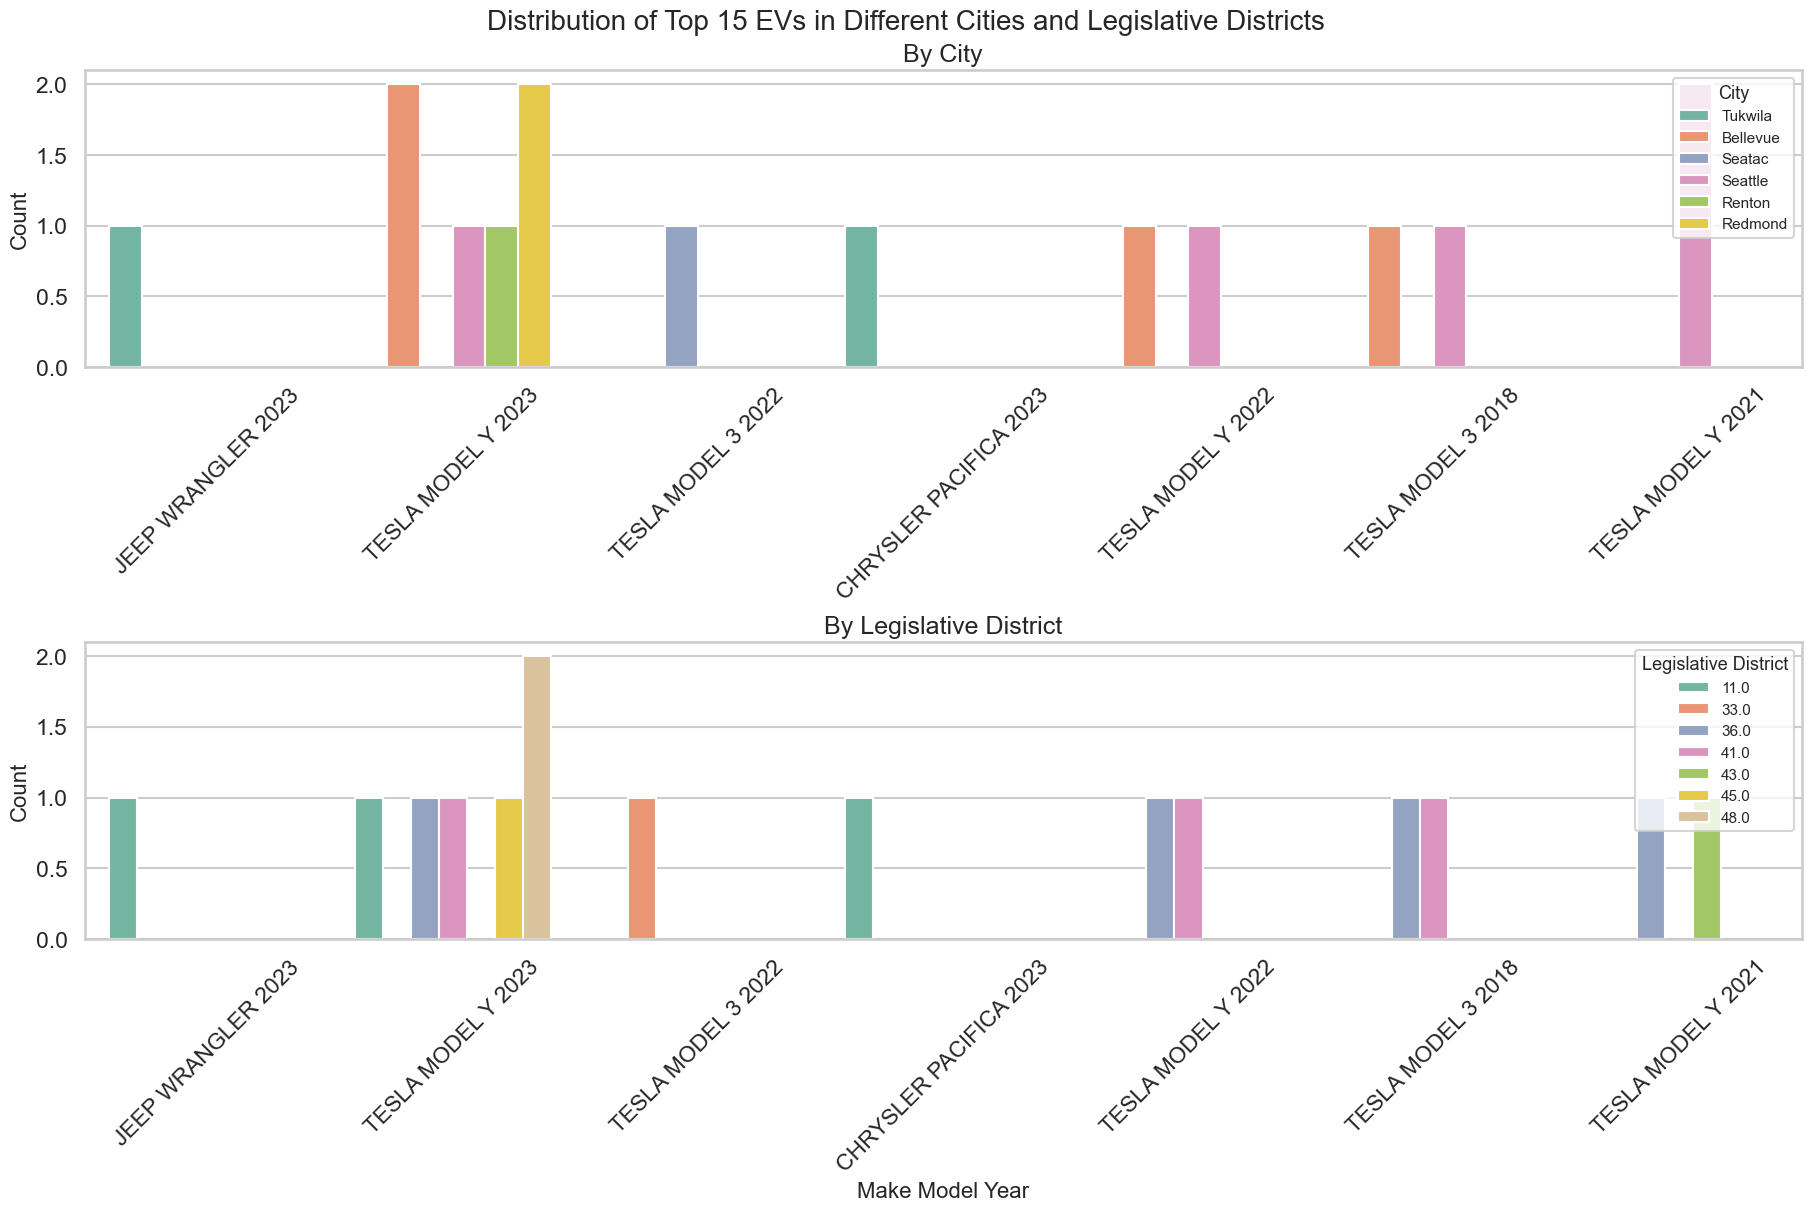

In [22]:


# Set style
sns.set_style("whitegrid")
sns.set_context("talk")

# Set color
palette = "Set2"

# size and style
plt.rcParams.update({'font.size': 12, 'font.family': 'sans-serif'})

top_15_ev['Make_Model'] = top_15_ev['Make'] + ' ' + top_15_ev['Model'] + ' ' + top_15_ev['Model Year'].astype(str)

fig, axes = plt.subplots(2, 1, figsize=(18, 12), constrained_layout=True)
fig.suptitle('Distribution of Top 15 EVs in Different Cities and Legislative Districts', fontsize=20)

#  City
ax1 = sns.countplot(ax=axes[0], data=top_15_ev, x='Make_Model', hue='City', palette=palette)
axes[0].set_title('By City', fontsize=18)
axes[0].set_xlabel('')
axes[0].set_ylabel('Count', fontsize=16)
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend(loc='upper right', title='City', title_fontsize='13', fontsize='11')



# Legislative district
ax2 = sns.countplot(ax=axes[1], data=top_15_ev, x='Make_Model',
                    hue='Legislative District', palette=palette)
axes[1].set_title('By Legislative District', fontsize=18)
axes[1].set_xlabel('Make Model Year', fontsize=16)
axes[1].set_ylabel('Count', fontsize=16)
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(loc='upper right', title='Legislative District', title_fontsize='13', fontsize='11')



plt.show()


### Result of the Analysis

Distribution of Top 15 EVs in Different Cities and Legislative Districts

The Tesla Model Y 2023 appears to be more widely distributed across the cities and district.

Other models have a more localized presence, predominantly appearing within specific cities and districts.


Seattle and Bellevue have a diverse range of top EV models, notably the Tesla Model Y 2022, Tesla Model 3 2018, and Tesla Model Y 2021.

Tukwila and District 11.0, uniquely, has a presence of Jeep Wrangler 2023 and Chrysler Pacifica 2023, models not observed in the other cities in the top list.

District 33.0 distinctively features the Tesla Model 3 2022.
The absence of specific models in certain districts like 43.0 for Tesla Model Y 2023 suggests varying preferences or availability constraints in these districts.

SeaTac notably has the Tesla Model 3 2022, which is not observed in other cities within the top models list.
Redmond and Renton do not have any of the top models listed, indicating a possible preference for other models in these cities.

The Tesla Model Y 2023 is the most widespread model, observed in 4 cities, indicating a possibly higher preference or availability in these cities.

Most other top models are predominantly present in specific cities, indicating a possible alignment of consumer preference or availability with the demographic and socio-economic characteristics of these cities.



When analyzing why specific cities and districts within King County have a distinctive presence in terms of top 15 EVs, several unique factors could potentially contribute to these patterns:


Urbanization and City Planning:

Urban Density:

More urbanized and densely populated areas may have higher EV adoption due to shorter travel distances and higher traffic congestion, where EVs are more efficient.

Zoning and Planning:

Cities with progressive urban planning may have policies and incentives in place promoting EV adoption.

Policy and Incentives:

Local Incentives:

Some cities and districts may offer additional incentives, such as tax credits or rebates, for EV purchases, influencing the adoption rate in those areas.

Legislative Support:

Areas with proactive legislative support for green initiatives may see higher adoption of EVs due to conducive policies and regulations.